In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ecommerce Dataset
There are 6 fields in the ecommerce dataset in this dataset and there will need to be some preprocessing to get the data ready for analysis.

#### is_mobile - binary variable telling us if the user is using a mobile device
#### N_products_viewed - Continuous, integer, how many products user viewed
#### Visit_duration - How long was the visitor on the site, continuous integer
#### Is_returning_visitor - binary variable marking returning visitors
#### Time_of_day - integer, 4 categories splitting the 24 hour day evenly
#### User_action - options: Bounce, add to cart, begin checkout, finish checkout

For our time variable the categories are as follows:
* 0 = 12 AM to 6 AM
* 1 = 6 AM to 12 PM
* 2 = 12 PM to 6 PM
* 3 = 6 PM to 12 AM

For the User action the categories are as follows:
* Bounce - the user visited the site and did not do anything
* Add to cart - the user added item to cart but never checked out
* Begin Checkout - The user went to start checking out but never finished
* Finish Checkout - the user finished the checkout process for their order

In [24]:
data = pd.read_csv(r'/Users/prof/Documents/machine_learning_examples/ann_logistic_extra/ecommerce_data.csv')

In [25]:
data.head()

,is_mobile,n_products_viewed,visit_duration,is_returning_visitor,time_of_day,user_action
0,1,0,0.657510,0,3,0
1,1,1,0.568571,0,2,1
2,1,0,0.042246,1,1,0
3,1,1,1.659793,1,1,2
4,0,1,2.014745,1,1,2


## Logistic Regression Example

In [26]:
N = 100
D = 2

x = np.random.randn(N,D) #Creating a normally distributed data matrix
ones = np.array([[1]*N]).T #Adding a column of 1 to add in the bias term
xb = np.concatenate((ones,x), axis = 1)

#Randomly Initialize a weight vector to show how to use the sigmoid
w = np.random.randn(D + 1)

In [27]:
#Multiplying our weights and independent variables using numpy dot function
z = xb.dot(w)

In [28]:
#Creating the sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(z))

In [29]:
sigmoid(z)

array([0.69456568, 0.67281618, 0.65251772, 0.72145095, 0.57746062,
       0.7092308 , 0.52297776, 0.48668909, 0.64916322, 0.85425149,
       0.57211232, 0.66044608, 0.74619792, 0.85743489, 0.67683743,
       0.74534232, 0.48235673, 0.69852963, 0.49532346, 0.77186857,
       0.67943208, 0.63567432, 0.65390778, 0.56511785, 0.44467205,
       0.73306633, 0.6444764 , 0.71585288, 0.790717  , 0.58383917,
       0.77303055, 0.68044869, 0.59357796, 0.7863176 , 0.65662495,
       0.52012304, 0.66395822, 0.71741855, 0.73897693, 0.74345857,
       0.5432722 , 0.70990199, 0.73838227, 0.59758029, 0.72753616,
       0.79769935, 0.67361625, 0.74259057, 0.65675113, 0.6797007 ,
       0.67331348, 0.5989304 , 0.64005053, 0.72705956, 0.57454453,
       0.6975067 , 0.67266616, 0.64308499, 0.60033897, 0.48602566,
       0.59077885, 0.82013846, 0.71636659, 0.79194221, 0.77940937,
       0.66004083, 0.64938355, 0.64741364, 0.52275008, 0.76268346,
       0.66046513, 0.52952064, 0.73946078, 0.72691537, 0.72663

## Preprocessing for logistic regression Ecommerce Data

In [69]:
data

,is_mobile,n_products_viewed,visit_duration,is_returning_visitor,time_of_day,user_action
0,1,0,0.657510,0,3,0
1,1,1,0.568571,0,2,1
2,1,0,0.042246,1,1,0
3,1,1,1.659793,1,1,2
4,0,1,2.014745,1,1,2
...,...,...,...,...,...,...
495,1,3,0.731594,0,0,2
496,0,0,6.368775,1,3,0
497,0,0,0.172853,1,3,0
498,1,0,0.209964,0,3,0


In [90]:
def process_data(data):
    dataset = data.values
    
    #split features and labels
    X = dataset[:,:-1]
    Y = dataset[:,-1].astype(np.int32)

    #Normalize the Independent variables
    X[:,1] = (X[:,1] - X[:,1].mean()) / x[:,1].std()
    X[:,2] = (X[:,2] - X[:,2].mean()) / x[:,2].std()
    
    
    N, D = X.shape
    X2 = np.zeros((N, D+3)) #There are four different categorical variables so we have D + 3 s
    X2[:,0:(D-1)] = X[:,0:(D-1)]
    
    for n in range(N):
        t = int(X[n, D-1])
        X2[n,t+D-1] = 1
    
    return X2, Y

In [91]:
def get_binary_data():
    x2, y = process_data(data)
    X2 = x2[y<=1]
    Y2 = y[y<=1]
    return X2, Y2

In [92]:
X2, Y2 = get_binary_data()

In [93]:
#Setup for the logistic regression model we will use the sigmoid function from above
D = X2.shape[1]
W = np.random.randn(D)
b = 0

def forward (X, W, b):
    return sigmoid(X.dot(W) + b)

def classification_rate(Y, P):
    return np.mean(Y==P)

In [94]:
p_y_given_x = forward(X2, W, b)
predictions = np.round(p_y_given_x)

In [95]:
cr = classification_rate(Y2, predictions)

In [96]:
#Finding the accuracy when we use randomly chosen weights and values
print('Accuracy: ' + str(cr))

Accuracy: 0.44472361809045224


# Calculating the Cross entropy loss function

In logistic regression, we aim to minimize the cross entropy or loss function, which is described below, where the first term only matters if the target value is 1, and the second value only matters is the target is 0.

$L = -{t log(y) + (1-t) log(1-y)}$<br>

We can also thing of the loss function in the opposite manner as maximizing the log likelihoood value.<br>
$J = {t log(y) + (1-t) log(1-y)}$<br>

The goal of this section is to understand how the loss function is calculated using randomly assigned values for our variables and weights. For the section below we are minimizing the cost where $T$ is the target value $\epsilon (0,1)$ and Y is the output from the logistic regression model

In [182]:
N = 100
D = 2

X = np.random.randn(N,D)

#Set the first 50 data points to be centered at x = -2 and y = -1
X[:50, :] = X[:50, :] - 2*np.ones((50,D))
X[50:,:] = X[50:,:] + 2*np.ones((50,D))

T = np.array([0]*50 + [1]*50)

w = np.random.randn(D + 1)

ones = np.array([[1]*N]).T
xb = np.concatenate((ones,X), axis = 1)

In [183]:
def cross_entropy(T, Y):
    E = 0
    for i in range(N):
        if T[i] == 1:
            E -= np.log(Y[i])
        else:
            E -= np.log(1-Y[i])
    return E

In [184]:
z = xb.dot(w)

In [185]:
Y = sigmoid(z)

In [186]:
print(cross_entropy(T, Y))

112.26977608732743


# Maximizing the likelihood

From earlier, we know our loss function takes the form below:

$J = -\sum \limits _{n=1} ^N t_{n}*log(y_{n}) + (1 - t_{n})*log(1-y_{n})$<br>

Can we prove maximizing the log likelihood function is related to minimizing our loss function? We have our logistic regression function 
$p(y=1|x) = \sigma(W ^T X)$<br>

and our likelihood function is (two asterisks indicates the power function):
$L = \Pi _{n=1} ^N  y _{n}**t_{n} + (1-y_{n})**(1-t_{n})$<br>

In our Likelihood equation, $\Pi$ is the symbol for production multiplication ($f_{x}(x_{1}), x_{2}, ...,x_{n} = f_{x}(x_{1})*f_{x}(x_{2})*...*f_{x}(x_{n})$) but when we take the log of the product, the equation changes. The log of a product become sht sum of the logs of the multiplied terms ($ln[f_{x}(x_{1})*f_{x}(x_{2})*...*f_{x}(x_{n}) = \sum \limits _{n=1} ^N ln[f_{X}(x{i}]$)<br>

So if we take the log of the likelihood function we get the function below which is a positive version of our loss function. So when we are looking at logistic regression, we have two options, we can either choose to minimize the loss function, or we can maximize the log likelihood function.

$\ell = \sum \limits _{n=1} ^N t_{n}log(y_{n}) + (1-t_{n})log(1-y_{n})$

# Updating Model Weights with Gradient Descent

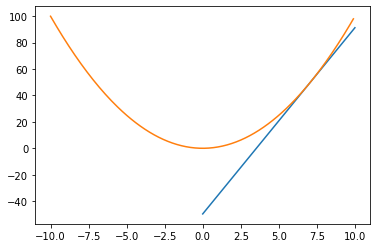

In [213]:
p_x = np.arange(-10,10,.1)
p_y = x**2
x_int = 0
y_int = -49.7
slope = 14.1

def find_point(slope, xx, yy):
    b0 = yy - (slope*xx)
    x2 = xx+10
    y2 = (slope*x2)+b0
    
    return x2, y2

x2, y2 = find_point(slope, x_int, y_int)

plt.plot((x_int, x2), (y_int, y2), label = 'line')
plt.plot(p_x,p_y)

plt.show()

The graph above helps illustrate the concept of gradient descent. Consider the orange parabola to be our loss function we want to minimize. In the example above the blue linear line is the starting point for our gradient descent problem where we begin with a randomly initialized set of weights and use them to calculate our cross entropy/loss function.

Once we calculate the loss function we can take steps towards minimizing the cost function using a learning rate. This means as we understand how far off we missed our targets, we can adjust the weights and take steps in the directions of the minimum for our loss function. We effectively change the slope of the blue line such that it is smaller and gets us closer to the global minimum. 

In the example below we have taken steps toward the optimal or minimized point of our loss curve, which can be seen by the change of the slow and movement towards the global minimum point of 0.

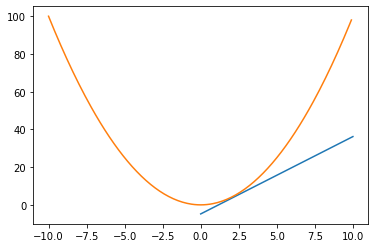

In [214]:
p_x = np.arange(-10,10,.1)
p_y = x**2
x_int = 0
y_int = -4.8
slope = 4.1

def find_point(slope, xx, yy):
    b0 = yy - (slope*xx)
    x2 = xx+10
    y2 = (slope*x2)+b0
    
    return x2, y2

x2, y2 = find_point(slope, x_int, y_int)

plt.plot((x_int, x2), (y_int, y2), label = 'line')
plt.plot(p_x,p_y)

plt.show()